In [1]:
from datascience import *
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

In [2]:
# Some utility functions for plotting and illustrating some concepts in class.
# You don't have to necessarily memorize these functions in this cell, 
# since they use things we may not have learned about in STOR 120


def resize_window(lim=3.5):
    plots.xlim(-lim, lim)
    plots.ylim(-lim, lim)
    
def draw_line(slope=0, intercept=0, x=make_array(-4, 4), color='r'):
    y = x*slope + intercept
    plots.plot(x, y, color=color)
    
def make_correlated_data(r):
    x = np.random.normal(0, 1, 1000)
    z = np.random.normal(0, 1, 1000)
    y = r*x + (np.sqrt(1-r**2))*z
    return x, y

def r_scatter(r):
    """Generate a scatter plot with a correlation approximately r"""
    plots.figure(figsize=(5,5))
    x, y = make_correlated_data(r)
    plots.scatter(x, y, color='darkblue', s=20)
    plots.xlim(-4, 4)
    plots.ylim(-4, 4)
    
def r_table(r):
    """
    Generate a table of 1000 data points with a correlation approximately r
    """
    np.random.seed(8)
    x, y = make_correlated_data(r)
    return Table().with_columns('x', x, 'y', y)

## Functions from Last Class

In [3]:
def standard_units(x):
    "Convert any array of numbers to standard units."
    return (x - np.average(x)) / np.std(x)

def correlation(t, x, y):
    """t is a table; x and y are column labels"""
    x_in_standard_units = standard_units(t.column(x))
    y_in_standard_units = standard_units(t.column(y))
    return np.average(x_in_standard_units * y_in_standard_units)

## Review: Correlation ##

In [48]:
HighPeaks = Table.read_table('HighPeaks.csv')
HighPeaks

Peak,Elevation,Difficulty,Ascent,Length,Time
Mt. Marcy,5344,5,3166,14.8,10
Algonquin Peak,5114,5,2936,9.6,9
Mt. Haystack,4960,7,3570,17.8,12
Mt. Skylight,4926,7,4265,17.9,15
Whiteface Mtn.,4867,4,2535,10.4,8.5
Dix Mtn.,4857,5,2800,13.2,10
Gray Peak,4840,7,4178,16,14
Iroquois Peak,4840,6,3250,11.6,8.5
Basin Mtn.,4827,6,3650,16.5,11
Gothics,4736,5,4070,10,9


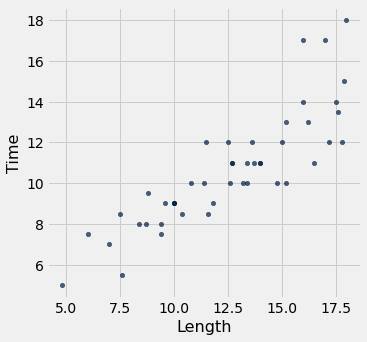

In [5]:
HighPeaks.scatter('Length', 'Time')

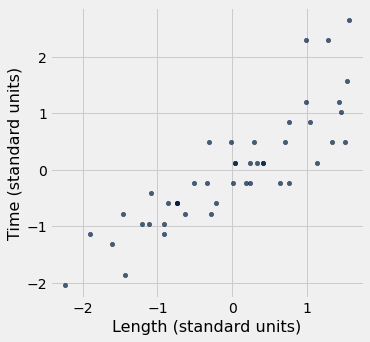

In [6]:
HighPeaks_LT = HighPeaks.select('Length', 'Time')

HighPeaks_LT = HighPeaks_LT.with_columns(
    'Length (standard units)',  standard_units(HighPeaks.column('Length')), 
    'Time (standard units)', standard_units(HighPeaks.column('Time'))
)

HighPeaks_LT.scatter('Length (standard units)', 'Time (standard units)')

In [7]:
correlation(HighPeaks, 'Length', 'Time')

0.85850786456945893

As a quick review, we also consider some other possible values of the correlation coefficint _r_ below, alongside their respective scatterplots.

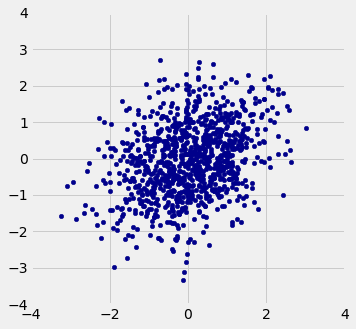

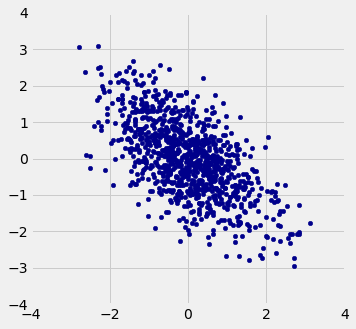

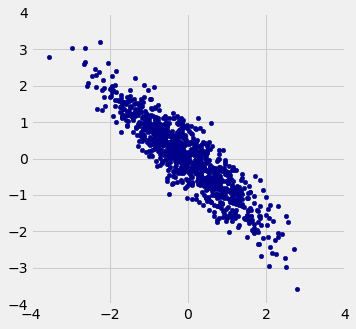

In [8]:
r_scatter(0.3), r_scatter(-0.6), r_scatter(-.9);

## Goal: Exploring the conceptual side of how to construct a `Prediction line` of the response variable, given values of the predictor variable.

To illustrate the conceptual viewpoint of constructing a prediction line, let us create a sample RANDOM dataset that we know its characteristic(that the correlation coefficient we know is approximately -0.9).

In [9]:
# The r_table function helps to generate a random set of x- and y-values 
# whose correlation coefficient is approximately equal to the value specified in the argument.

example = r_table(-0.9)
example.show(3)

x,y
0.0912047,-0.571236
1.09128,-1.09483
-1.94697,1.88928


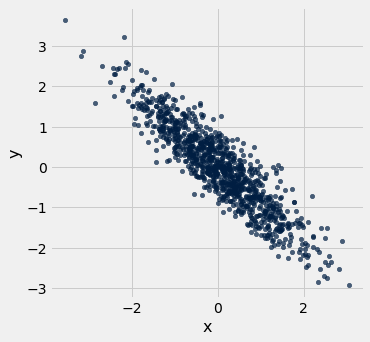

In [10]:
# Visualize the relationship between the two numerical variables using a scatterplot.

example.scatter('x', 'y')

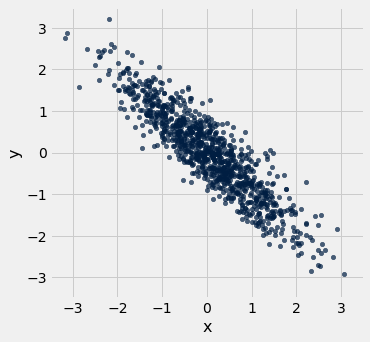

In [11]:
example.scatter('x', 'y')
resize_window()

# Research Question #

If the value of the explanatory variable _x_ is equal to some given value, say -1, can you predict the expected/average value of the response variable _y_?

The key strategy here is to use the idea of nearest neighbors. How do we implement this idea?

- Step 1: Define some rule for selecting the nearest neighbors of observations whose x-value is the given value(-1 in this example). 
- Step 2: Then select all observations(both x- and y-values) in the data set that meet the conditions of the rule in step 1(i.e. whose x-values are within some reasonably close distance(say 0.25 units - this is some arbirarily chosen number) above or below the given value of x(-1 in this case)).
- Step 3: Collect the y-values of all observations from step 1 above.
- Step 4: Return the mean of all y-values from the last step above. This is the predicted value of y when 

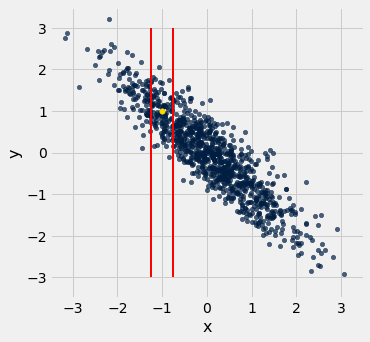

In [12]:
# A visualization of the rule specified in 1 above.

example.scatter('x', 'y')
plots.plot([-1.25, -1.25], [-3, 3], color='red', lw=2)
plots.plot([-0.75, -0.75], [-3, 3], color='red', lw=2)
plots.scatter(-1, 1, s=30, color='gold')
resize_window()

In [13]:
# Subsetting/Extracting observations from the dataset that satisfy 
# the conditions to be a nearest neighbor
# Implementing steps 1 and 2 below.

x_val = -1
neighbors = example.where('x', are.between(x_val - .25, x_val + .25))
neighbors

x,y
-1.18343,0.148259
-1.12333,1.14279
-0.791615,0.582555
-1.16459,0.851673
-0.934348,1.11741
-0.811461,1.33229
-1.15127,1.7641
-0.952161,0.657031
-1.20081,1.16546
-0.92146,0.670255


In [14]:
# Implementing steps 3 and 4 below.

np.mean(neighbors.column('y'))

0.93919651267838244

Solution to the Research Question: When x = -1, the predicted value of _y_ is equal to the value obtained above(depending on the random set of x- and y-values generated for each of us).

In [15]:
print('When x is -1, the predicted/average value of y  is', np.mean(neighbors.column('y')))

When x is -1, the predicted/average value of y  is 0.939196512678


In [16]:
# We roll up all steps 1 through 4 into a single function call below:

def nn_prediction_example(x_val):
    """ Predicts y-value for x based on the example table """
    neighbors = example.where('x', are.between(x_val - .25, x_val + .25))
    return np.mean(neighbors.column('y'))

In [17]:
nn_prediction_example(-1)

0.93919651267838244

In [18]:
nn_prediction_example(-2.25)

2.3033196129727118

Let us apply the function to all values of x, to generate a predicted value y, for the given values of x in the original dataset.

In [19]:
example = example.with_columns(
    'Predicted y', 
    example.apply(nn_prediction_example, 'x'))

example

x,y,Predicted y
0.0912047,-0.571236,-0.0340624
1.09128,-1.09483,-0.989771
-1.94697,1.88928,1.78727
-1.38635,1.32725,1.20159
-2.29649,2.4506,2.28908
2.40983,-1.5183,-2.06595
1.72784,-1.39953,-1.48872
2.20456,-0.714786,-1.9471
0.794828,-0.742013,-0.678926
0.976421,-0.215279,-0.881975


It makes natural sense to compare the actual value of y to the predicted value of y below.

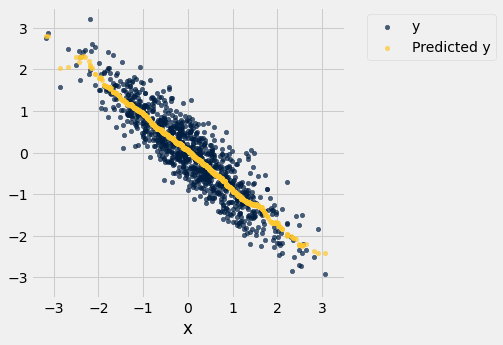

In [20]:
example.scatter('x')
resize_window()

Now, recall that we generated the `example` dataset we are using for this discussion by specifying the approximate value of the correlation coefficient.

- It turns out that when both the x and the predicted/estimated value of y variables are already in standard units, the following relationship holds true

$$
\text { predicted value/estimate of } y=r \cdot \text { (x in standard units) } 
$$

which in the original units of the data becomes 

$$
\frac{\text { estimate of } y-\text { average of } y}{\text { SD of } y}=r \times \frac{\text { the given } x-\text { average of } x}{\text { SD of } x}
$$

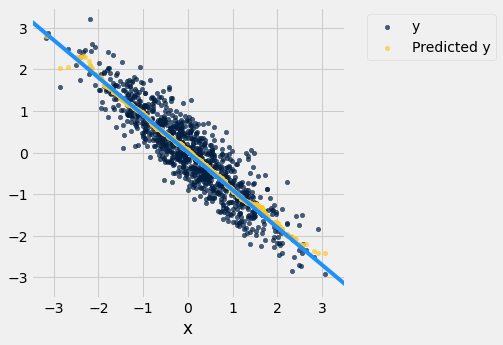

In [21]:
example.scatter('x')
draw_line(slope = -0.9, color='dodgerblue')
resize_window()

$$
\text { predicted value/estimate of } y=r \cdot \text { (x in standard units) } 
$$

which in the original units of the data becomes 

$$
\frac{\text { estimate of } y-\text { average of } y}{\text { SD of } y}=r \times \frac{\text { the given } x-\text { average of } x}{\text { SD of } x}
$$

From here, we can derive a general formula for computing the slope and intercept of a prediction line, given the raw x- and y-values below:

$$
\text { slope of the regression line }=r \cdot \frac{\operatorname{SD} \text { of } y}{\operatorname{SD} \text { of } x}
$$

and 

$$
\text { intercept of the regression line }=\text { average of } y-\text { slope } \cdot \text { average of } x
$$

Example: using the `HighPeaks.csv` dataset, find the regression/prediction line that helps to predict value of `Time` to climb a mountain based on the variable `Length`.

In [23]:
HighPeaks_LT 

Length,Time,Length (standard units),Time (standard units)
14.8,10,0.641925,-0.23595
9.6,9,-0.857572,-0.59774
17.8,12,1.50702,0.48763
17.9,15,1.53586,1.573
10.4,8.5,-0.62688,-0.778635
13.2,10,0.180541,-0.23595
16,14,0.987963,1.21121
11.6,8.5,-0.280842,-0.778635
16.5,11,1.13215,0.12584
10,9,-0.742226,-0.59774


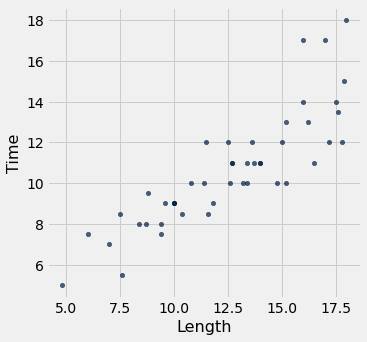

In [24]:
HighPeaks_LT.scatter('Length', 'Time')

Using the formula: 

$$
\text { slope of the regression line }=r \cdot \frac{\operatorname{SD} \text { of } y}{\operatorname{SD} \text { of } x}
$$

and 

$$
\text { intercept of the regression line }=\text { average of } y-\text { slope } \cdot \text { average of } x
$$

## Linear regression: Defining the line of best fit ## (Why is it called that?)

In [32]:
def slope(t, x, y):
    """t is a table; x and y are column labels"""
    r = correlation(t, x, y)
    slope_xy = r * np.std(t.column(y)) / np.std(t.column(x))
    return slope_xy

In [33]:
def intercept(t, x, y):
    """t is a table; x and y are column labels"""
    slope_xy = slope(t, x, y)
    intercept_xy = np.average(t.column(y) - slope_xy * np.average(t.column(x)))
    return intercept_xy

In [34]:
slope(HighPeaks_LT, 'Length', 'Time')

0.68427394064766012

In [35]:
intercept(HighPeaks_LT , 'Length', 'Time')

2.0481728854215957

In [36]:
Time_predict = slope(HighPeaks_LT , 'Length', 'Time') * 3000 + intercept(HighPeaks_LT, 'Length', 'Time')

print('It will take', np.round(Time_predict, 2), 'hours to climb a mountain with an ascent of 3000 ft')

It will take 2054.87 hours to climb a mountain with an ascent of 3000 ft


In [39]:
y_estimate = slope(HighPeaks_LT , 'Length', 'Time') * HighPeaks_LT.column('Length') + intercept(HighPeaks_LT, 'Length', 'Time')
y_estimate

array([ 12.17542721,   8.61720272,  14.22824903,  14.29667642,
         9.16462187,  11.0805889 ,  12.99655594,   9.9857506 ,
        13.33869291,   8.89091229,  12.44913678,   6.15381653,
        10.67002454,   9.84889581,  14.02296685,   6.83809047,
        11.21744369,  14.09139424,  12.44913678,  11.21744369,
         7.79607399,  10.73845193,  11.42272587,  12.99655594,
        11.62800805,  13.13341072,   8.48034793,   8.48034793,
        10.73845193,   8.00135617,   8.06978356,   8.89091229,
        13.68082988,  11.62800805,  10.12260539,   5.3326878 ,
         9.9173232 ,   7.24865483,   9.43833144,  14.36510382,
         8.89091229,  10.60159714,  11.35429848,  13.81768466,
         7.18022744,  12.312282  ])

In [51]:
# Compare the estimates from method 1 and method 2.
# Decide which one you prefer better.

HighPeaks_LT.with_column(
    'method 2 estimate', y_estimate
)

Length,Time,Length (standard units),Time (standard units),predicted y-values(standard units),raw predicted values of y,method 1 estimate,method 2 estimate
14.8,10,0.641925,-0.23595,0.551098,12.1754,12.1754,12.1754
9.6,9,-0.857572,-0.59774,-0.736232,8.6172,8.6172,8.6172
17.8,12,1.50702,0.48763,1.29379,14.2282,14.2282,14.2282
17.9,15,1.53586,1.573,1.31854,14.2967,14.2967,14.2967
10.4,8.5,-0.62688,-0.778635,-0.538181,9.16462,9.16462,9.16462
13.2,10,0.180541,-0.23595,0.154996,11.0806,11.0806,11.0806
16,14,0.987963,1.21121,0.848174,12.9966,12.9966,12.9966
11.6,8.5,-0.280842,-0.778635,-0.241105,9.98575,9.98575,9.98575
16.5,11,1.13215,0.12584,0.971956,13.3387,13.3387,13.3387
10,9,-0.742226,-0.59774,-0.637207,8.89091,8.89091,8.89091


In [52]:
min(HighPeaks_LT.column('Length')), max(HighPeaks.column('Length'))

(4.7999999999999998, 18.0)

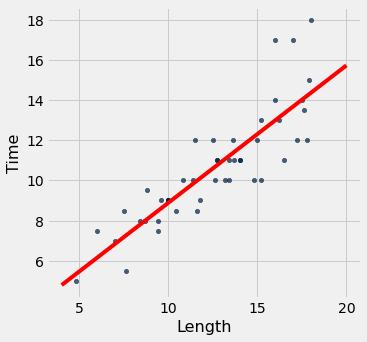

In [53]:
HighPeaks_LT.scatter('Length', 'Time')
draw_line(
    slope = slope(HighPeaks_LT , 'Length', 'Time'), 
    intercept = intercept(HighPeaks_LT, 'Length', 'Time'), 
    x = make_array(4, 20), 
    color='r'
)

Fitting the regression line(or the line of best) could have been done by setting the extra argument `fit_line=True`

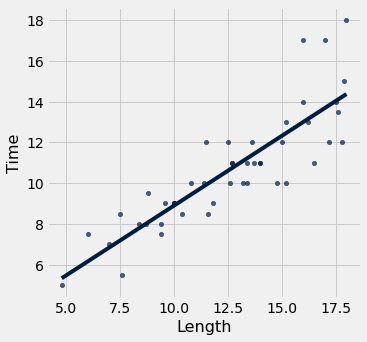

In [55]:
HighPeaks_LT.scatter('Length', 'Time', fit_line=True)